In [74]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
with open ("transaction-data.json",'r')as f:
    tdata = json.load(f)

In [76]:
raw_df = pd.read_json("transaction-data.json")
raw_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [77]:
split_items_df =(raw_df.set_index(['address','birthdate','mail','name','sex','username','transaction_value','transaction_date'])
.apply(lambda x: x.str.split(';').explode())
.reset_index())

split_items_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)"
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)"
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)"
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)"
...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)"
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)"
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)"
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)"


In [78]:
item_df = raw_df.drop("transaction_items", axis=1).join(
             raw_df.transaction_items
             .str
             .split(";", expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('transaction_items'))

rawitem_df = raw_df.drop("transaction_items", axis=1).join(
             raw_df.transaction_items
             .str
             .split(";", expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('transaction_items'))

In [79]:
rawitem_df["Month"] = pd.DatetimeIndex(rawitem_df["transaction_date"]).month
rawitem_df["Item"] = rawitem_df.transaction_items.str.split(",", expand=True)[1]
rawitem_df["Quantity"] = rawitem_df.transaction_items.str.split(",", expand=True)[2]
rawitem_df["Real Quantity"] = rawitem_df["Quantity"].str.extract("(\d+)").astype(int)
rawitem_df = rawitem_df.drop(["Quantity"], axis=1)

In [80]:
rawitem_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,Month,Item,Real Quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",1,Beef Chicharon,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",1,Beef Chicharon,3
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",1,Nutrional Milk,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",1,Orange Beans,1
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",1,Gummy Vitamins,3
...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",6,Nutrional Milk,2
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",6,Gummy Worms,2
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",6,Nutrional Milk,1
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",6,Gummy Worms,3


In [81]:
#pivot table to display count of each item sold per month 

monthly_pivot = pd.pivot_table(data=rawitem_df, values=['Real Quantity'], 
                    index=['Month'], columns=['Item'],aggfunc="sum")

monthly_pivot

Real Quantity                                                \
Item  Beef Chicharon Gummy Vitamins Gummy Worms Kimchi and Seaweed   
Month                                                                
1               9665           9681        9559               9676   
2              10001           9980        9996               9949   
3               9816          10145        9986               9967   
4               9890           9842       10043               9921   
5              10028           9948        9801               9773   
6               9902           9980        9934              10104   

                                                    
Item  Nutrional Milk Orange Beans Yummy Vegetables  
Month                                               
1               9727         9774             9959  
2               9691        10037            10256  
3               9876         9611             9896  
4               9786         9914             9861  
5               9881         9964             9735  
6               9767        10106             9722

Text(0.5, 1.0, 'Count of Each Item Sold Per Month')

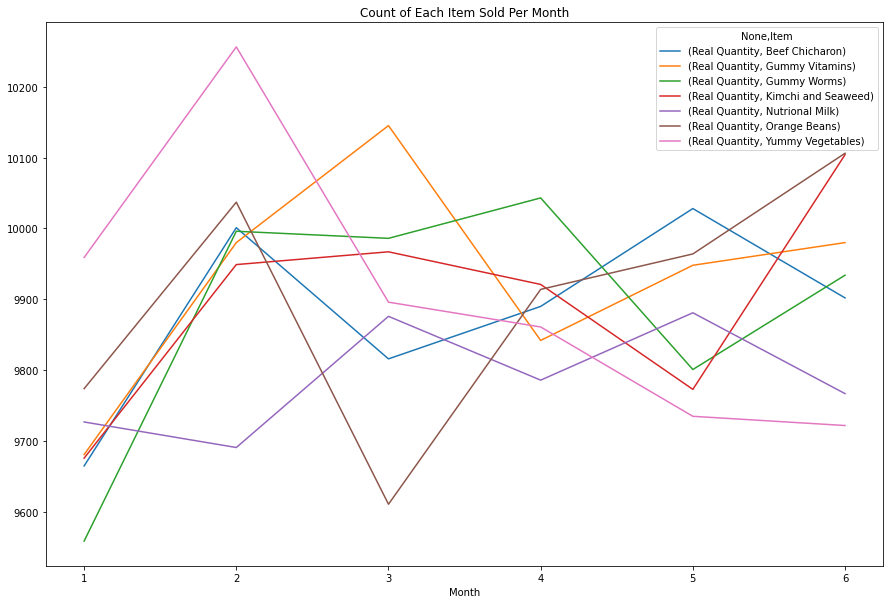

In [148]:
monthly_pivot.plot.line(figsize=(15,10))
plt.title('Count of Each Item Sold Per Month')

In [38]:
import string
pricelist_df = raw_df.copy()

pricelist_df = pricelist_df.assign(transaction_items=pricelist_df.transaction_items.str.split(";"))
pricelist_df = pricelist_df[pricelist_df["transaction_items"].apply(len)==1]

pricelist_df["transaction_items"] = pricelist_df["transaction_items"].apply(lambda lst: lst[0])
pricelist_df['amount'] = pricelist_df["transaction_items"].apply(lambda x: int(x.split(',')[-1].strip('(x)')))
pricelist_df["transaction_items"] = pricelist_df["transaction_items"].apply(lambda lst: lst[:-5])

pricelist_df = pricelist_df.drop_duplicates(subset="transaction_items", keep="first")

labels = list(pricelist_df['transaction_items'].values)
pricelist_df = pricelist_df['transaction_value'] / pricelist_df['amount']

pricelist_df.index = labels
pricelist_df.sort_values() 

Candy City,Gummy Worms               150.0
Candy City,Orange Beans              199.0
HealthyKid 3+,Yummy Vegetables       500.0
Exotic Extras,Kimchi and Seaweed     799.0
Exotic Extras,Beef Chicharon        1299.0
HealthyKid 3+,Gummy Vitamins        1500.0
HealthyKid 3+,Nutrional Milk        1990.0
dtype: float64

In [73]:
df_salevalue = monthly_pivot.multiply(np.array(pricelist_df.T), axis = 'columns')
df_salevalue

Real Quantity                                                \
Item  Beef Chicharon Gummy Vitamins Gummy Worms Kimchi and Seaweed   
Month                                                                
1         12554835.0      4840500.0   7637641.0          1451400.0   
2         12991299.0      4990000.0   7986804.0          1492350.0   
3         12750984.0      5072500.0   7978814.0          1495050.0   
4         12847110.0      4921000.0   8024357.0          1488150.0   
5         13026372.0      4974000.0   7830999.0          1465950.0   
6         12862698.0      4990000.0   7937266.0          1515600.0   

                                                    
Item  Nutrional Milk Orange Beans Yummy Vegetables  
Month                                               
1         14590500.0   19450260.0        1981841.0  
2         14536500.0   19973630.0        2040944.0  
3         14814000.0   19125890.0        1969304.0  
4         14679000.0   19728860.0        1962339.0  
5         14821500.0   19828360.0        1937265.0  
6         14650500.0   20110940.0        1934678.0

###

In [118]:
filtered_df = raw_df[['name']]

all_customers = list(filtered_df['name'].unique())

pd.DataFrame(all_customers,columns=['name'])

,name
0,Jennifer Campbell
1,Melissa Kim
2,Kristen Cooper
3,Alexander Davis
4,Michael Lowe
...,...
8482,Patricia Carter
8483,Ryan Stevens
8484,Sonia Jones
8485,Sue Douglas


In [119]:
customer_tally = rawitem_df[['name','Real Quantity','Month']]
customer_tally = pd.pivot_table(
    customer_tally,
    values='Real Quantity', 
    index=['Month'],
    columns=['name'],
    aggfunc=sum,
    fill_value = 0)

customer_tally

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
Month,,,,,,,,,,,,,,,,,,,,,
1,0,4,0,1,6,0,11,11,8,0,...,17,0,13,16,0,7,6,24,0,8
2,0,6,0,7,1,11,15,3,15,13,...,15,1,15,10,0,6,9,23,0,17
3,0,1,20,9,0,0,5,0,6,9,...,14,0,3,19,14,3,16,19,0,7
4,9,9,14,12,15,1,8,5,0,4,...,27,5,15,31,6,2,5,14,4,12
5,8,0,8,12,15,7,0,0,7,8,...,8,13,9,31,7,14,10,0,4,23
6,1,13,1,0,12,0,1,16,7,6,...,10,4,5,40,9,19,8,0,10,5


In [146]:
inactives = customer_tally.apply(lambda x: [0 if i==1 else ((1 if x[i]==0 else 0) if any(x[:i]) else 0) for i in x.index]).transpose().sum()
engaged = customer_tally.apply(lambda x: [1 if all(x[:i]) else 0 for i in x.index]).transpose().sum()
repeaters = customer_tally.apply(lambda x: [0 if i==1 else (1 if x[i-1] and x[i] else 0)for i in x.index]).transpose().sum()

customer_categories_df = pd.DataFrame({
    'repeater': repeaters,
    'inactive': inactives,
    'engaged' : engaged,})
                           
customer_categories_df

,repeater,inactive,engaged
Month,,,
1,0,0,6588
2,5172,1416,5172
3,5216,1747,4126
4,5154,1909,3289
5,5110,1917,2667
6,5193,1835,2190
